[[145 145 145 ... 160 160 160]
 [144 144 144 ... 160 160 160]
 [142 143 143 ... 160 160 160]
 ...
 [161 157 154 ... 192 191 191]
 [161 157 154 ... 191 190 189]
 [161 157 154 ... 190 189 188]]


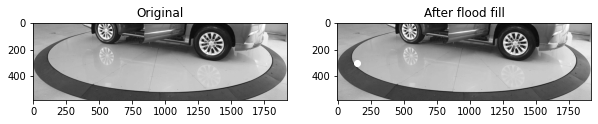

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters, color, morphology
from skimage.segmentation import flood, flood_fill
import cv2

img = cv2.imread('car_.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
checkers = gray
print(checkers)
filled_checkers = flood_fill(checkers, (120, 265), 300)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

ax[0].imshow(checkers, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filled_checkers, cmap=plt.cm.gray)
ax[1].plot(150, 300, 'wo')  # seed point
ax[1].set_title('After flood fill')

plt.show()

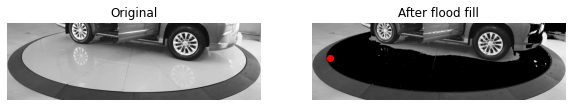

In [262]:
img = cv2.imread('car_.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

# Change the white plate from white to black (0).  The seed point is (245,123)

light_coat = flood_fill(gray, (140, 265), 255, tolerance=45)
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

ax[0].imshow(gray, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow((light_coat)%255, cmap=plt.cm.gray)
ax[1].plot(140, 265, 'ro')  # seed point
ax[1].set_title('After flood fill')
ax[1].axis('off')

plt.show()

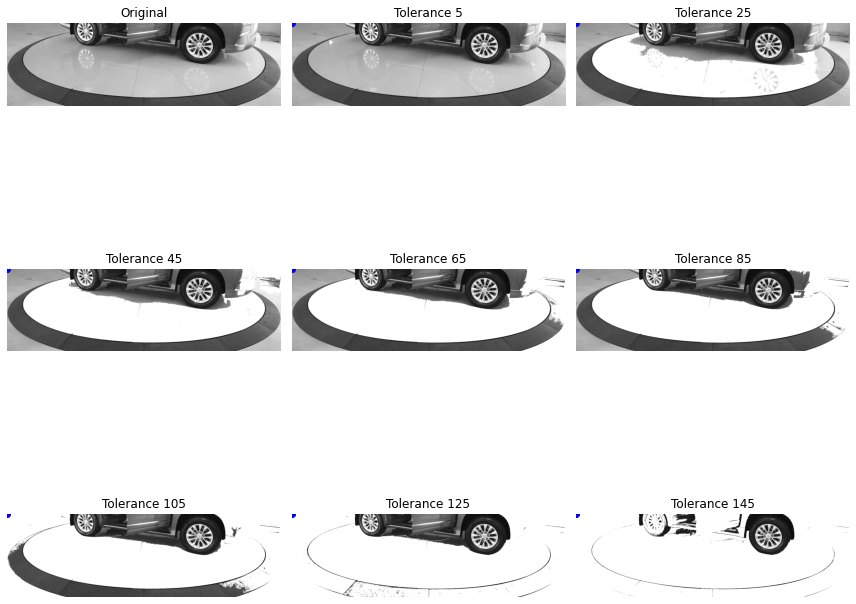

In [263]:
output = []

for i in range(8):
    tol = 5 + 20 * i
    output.append(flood_fill(gray, (120,266), 255, tolerance=tol))

# Initialize plot and place original image
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
ax[0, 0].imshow(gray, cmap=plt.cm.gray)
ax[0, 0].set_title('Original')
ax[0, 0].axis('off')

# Plot all eight different tolerances for comparison.
for i in range(8):
    m, n = np.unravel_index(i + 1, (3, 3))
    ax[m, n].imshow(output[i], cmap=plt.cm.gray)
    ax[m, n].set_title('Tolerance {0}'.format(str(5 + 20 * i)))
    ax[m, n].axis('off')
    ax[m, n].plot(0, 0, 'bo')  # seed point

fig.tight_layout()
plt.show()

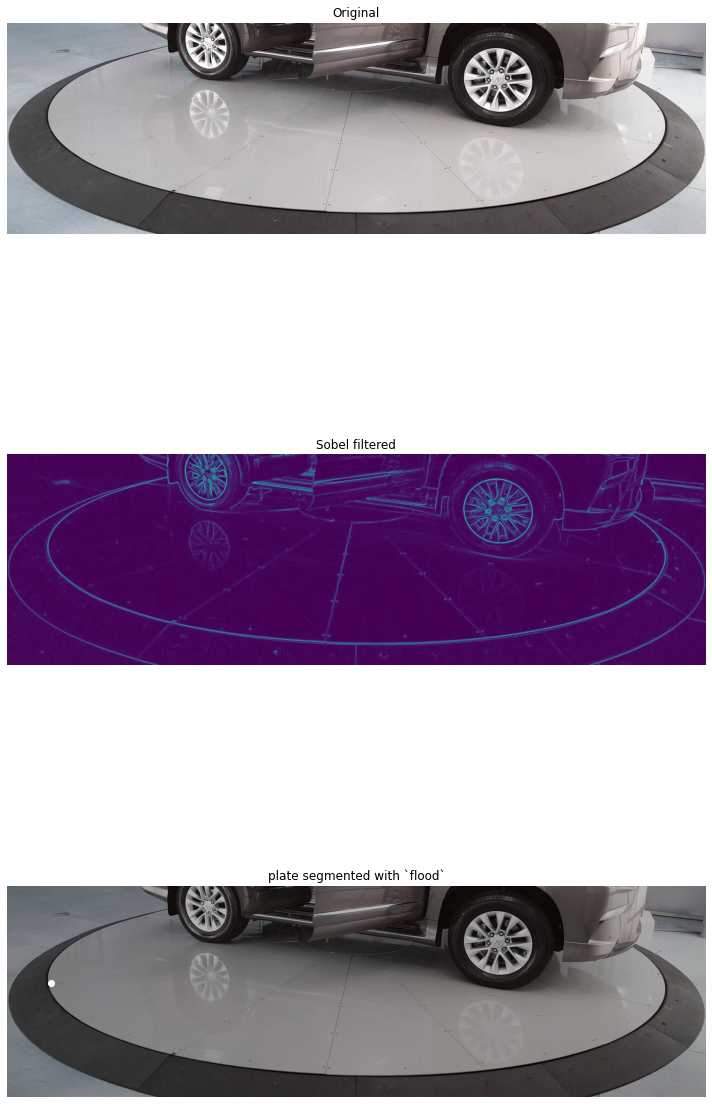

In [264]:
car = cv2.imread("car_.jpg")
car_sobel = filters.sobel(car[..., 0])
car_plate = flood(car_sobel, (120, 266), tolerance=40)

fig, ax = plt.subplots(nrows=3, figsize=(10, 20))

ax[0].imshow(car)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(car_sobel)
ax[1].set_title('Sobel filtered')
ax[1].axis('off')

ax[2].imshow(car)
ax[2].imshow(car_plate, cmap=plt.cm.gray, alpha=0.3)
ax[2].plot(120, 266, 'wo')  # seed point
ax[2].set_title('plate segmented with `flood`')
ax[2].axis('off')

fig.tight_layout()
plt.show()

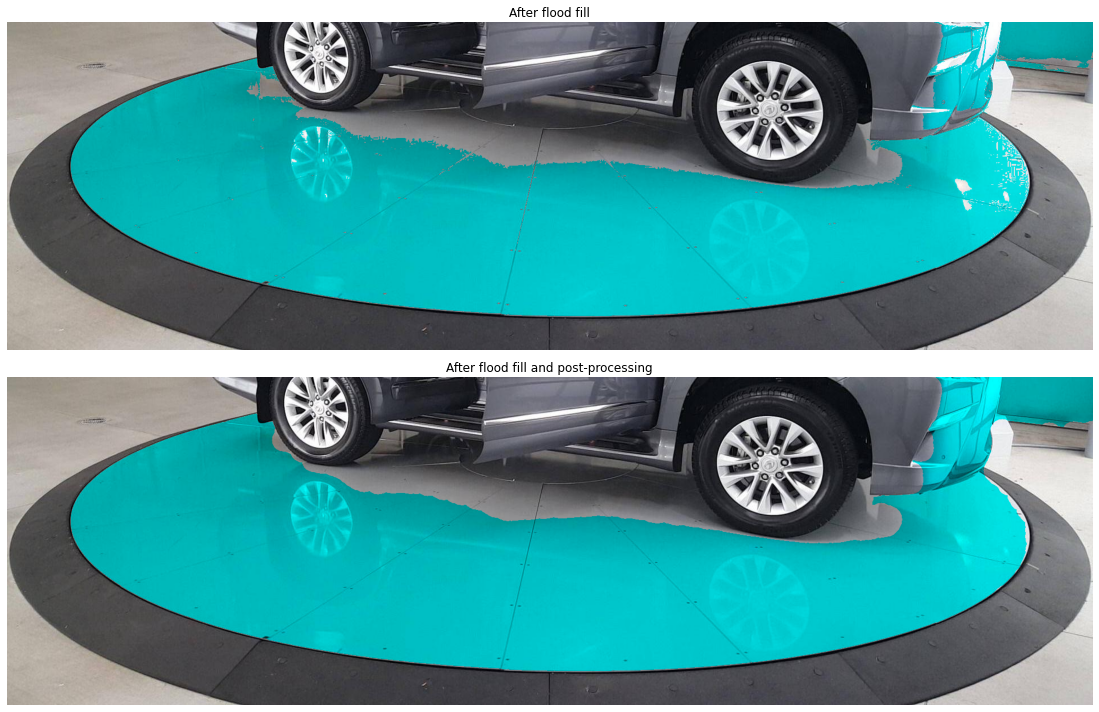

In [266]:
img = cv2.imread("car_.jpg")
img_rgb = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
img_rgb_copy = np.copy(img_rgb)

# flood function returns a mask of flooded pixels
mask = flood(img_rgb[..., 0], (120,264), tolerance=39)
img_rgb[mask, 0] = 1
# Post-processing in order to improve the result
# Remove white pixels from flag, using saturation channel
mask_postprocessed = np.logical_and(mask,
                                    img_rgb_copy[..., 1] > 0.6)
# Remove thin structures with binary opening
mask_postprocessed = morphology.binary_opening(mask_postprocessed,
                                               np.ones((3, 3)))
# Fill small holes with binary closing
mask_postprocessed = morphology.binary_closing(
                mask_postprocessed, morphology.disk(20))
img_rgb_copy[mask_postprocessed, 0] = 0.5

fig, ax = plt.subplots(nrows=2, figsize=(20, 10))
ax[0].imshow((img_rgb))
ax[0].axis('off')
ax[0].set_title('After flood fill')
ax[1].imshow((img_rgb_copy))
ax[1].axis('off')
ax[1].set_title('After flood fill and post-processing')

fig.tight_layout()
plt.show()